Example of Rock type classification
=====

This is a simple example of classification of rock types using Scikit-Learn lib. We take the major and some trace elements as features in order to classify some rock samples. The data base is obtained from georoc : http://georoc.mpch-mainz.gwdg.de/.


 Antoine Lucas (lucas@ipgp.fr) 
 

-----------

Some Preambule

In [12]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

We need to arrange the data in a nice way. We change the label into interger ans we replace some Nans with 0 (although this may not be ideal)

In [13]:
def GetData(filename):
    rock_df = pd.read_csv(filename,sep=';')
    rock_df["ROCK TYPE"][rock_df["ROCK TYPE"] == "VOLCANIC ROCK"] = 0
    rock_df["ROCK TYPE"][rock_df["ROCK TYPE"] == "MANTLE XENOLITH"] = 1
    rock_df["ROCK TYPE"][rock_df["ROCK TYPE"] == "PLUTONIC ROCK"] = 2
    rock_df["ROCK TYPE"][rock_df["ROCK TYPE"] == "METAMORPHIC ROCK"] = 3

    X = rock_df.copy()


    lbl=['SIO2(WT%)', 'TIO2(WT%)', 'AL2O3(WT%)','CAO(WT%)', 'MGO(WT%)'];
    X  = X[lbl]
    X = X.fillna(0)


    y = rock_df["ROCK TYPE"]
    y = np.asarray(y)
    y=y.astype(int)
    dtype = pd.CategoricalDtype(['a', 'b','c','d'], ordered=True)

    pd.Categorical.from_codes(codes=y, dtype=dtype)
    return X,y,lbl

def DoClassif(classif,X_train,X_test,y_train,y_test,name):
    
    classif.fit(X_train,y_train)
    y_pred=classif.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')   
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [14]:
X,y,lbl = GetData("RockData2.csv")
X.head()

/var/folders/_g/1hjn4l610d19qpg4_12q4mxm0000gn/T/ipykernel_11620/3937813518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rock_df["ROCK TYPE"][rock_df["ROCK TYPE"] == "VOLCANIC ROCK"] = 0
/var/folders/_g/1hjn4l610d19qpg4_12q4mxm0000gn/T/ipykernel_11620/3937813518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rock_df["ROCK TYPE"][rock_df["ROCK TYPE"] == "MANTLE XENOLITH"] = 1
/var/folders/_g/1hjn4l610d19qpg4_12q4mxm0000gn/T/ipykernel_11620/3937813518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

SIO2(WT%)  TIO2(WT%)  AL2O3(WT%)  CAO(WT%)  MGO(WT%)
0      60.73       1.08       16.75      3.55      1.11
1      63.34       0.78       16.18      2.45      0.78
2      52.93       0.50        6.51     20.18     15.11
3      52.18       0.32        7.42     19.67     15.22
4      51.15       0.87        7.30     16.53     15.41

Now, we want to train our model, so we split the data set into a training set and a test set.

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=41)

We instantiate the model (using the default parameters)

In [16]:
logreg = LogisticRegression(max_iter=5000)

fit the model with data

In [17]:
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

Let's now make a prediction

In [18]:
y_pred=logreg.predict(X_test)

Now we evaluate the results by analysing the confusion matrix:

Accuracy on test data: 0.76
 
0: VOLCANIC ROCK
1: MANTLE XENOLITH
2: PLUTONIC ROCK
3: METAMORPHIC ROCK


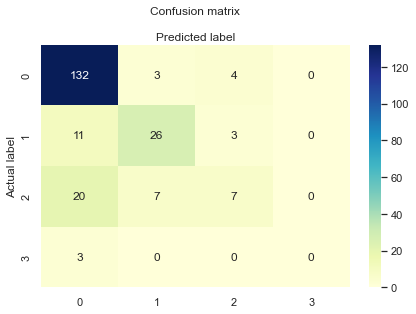

In [19]:
print("Accuracy on test data: {:.2f}".format(logreg.score(X_test, y_test)))
print(" ")

cnf_matrix = confusion_matrix(y_test, y_pred)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout();
plt.title('Confusion matrix', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

print("0: VOLCANIC ROCK")
print("1: MANTLE XENOLITH")
print("2: PLUTONIC ROCK")
print("3: METAMORPHIC ROCK")

Let's assess now the feature importance from the Logistic Regression Model

[False  True False False False]
[5 1 4 3 2]
[[-0.0731  0.1422 -0.1495 -0.0777 -0.1442]
 [ 0.0288 -0.3011  0.0655  0.0876  0.1268]
 [ 0.0196  0.3178  0.0537 -0.0438  0.0293]
 [ 0.0247 -0.1589  0.0303  0.0339 -0.012 ]]
[5 1 4 3 2]
[4 0 3 2 1]
[-4.1265  1.6439  2.6833 -0.2007]


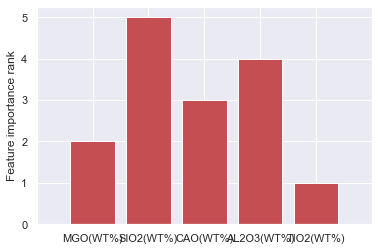

In [20]:
from  sklearn.feature_selection import RFE
feat_selec = RFE(logreg,n_features_to_select=1)
feat_selec = feat_selec.fit(X_train,y_train)
feat_impo_order = feat_selec.ranking_


# Print the feature ranking

print(feat_selec.support_)
print(feat_selec.ranking_)

indices = (feat_impo_order)-1
print(logreg.coef_)
print(feat_impo_order)
print(indices)
print(np.dot(logreg.coef_,np.std(X,0)))
# Plot the feature importances of the forest
plt.figure()
plt.bar(range(X.shape[1]), feat_impo_order[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), [lbl[element] for element in indices])
plt.xlim([-1, X.shape[1]])
plt.ylabel('Feature importance rank')
plt.show()


Let's be more specific on this ranking and on the respective contribution by performing permutation over the data.

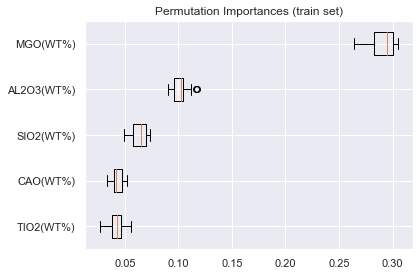

In [21]:
from sklearn.inspection import permutation_importance
result = permutation_importance(logreg, X, y, n_repeats=15,
                                random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

So, clearly CaO, TiO2 and Si02 may lead to overfitting. We may consider removing them, or converting them to element ratios for instance (i.e., change in feature space domain). We can also consider the minor elements as well. And finally, we can also consider other classifier:

/Users/alucas/miniconda/envs/lsforce/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (train) for LogisticRegression: 74.5% 
Accuracy (train) for QuadraticDiscriminantAnalysis: 72.7% 
Accuracy (train) for SVC: 77.3% 
Accuracy (train) for GaussianProcessClassifier: 85.2% 
Accuracy (train) for DecisionTreeClassifier: 80.1% 


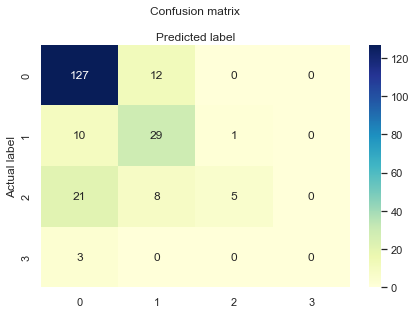

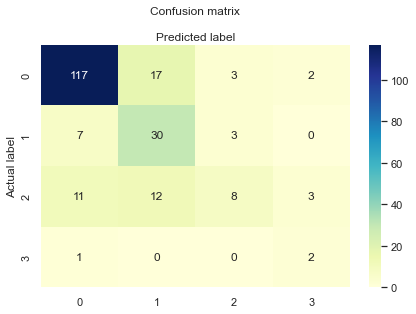

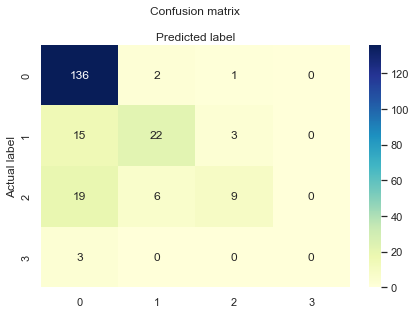

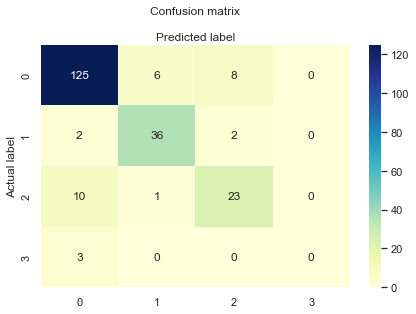

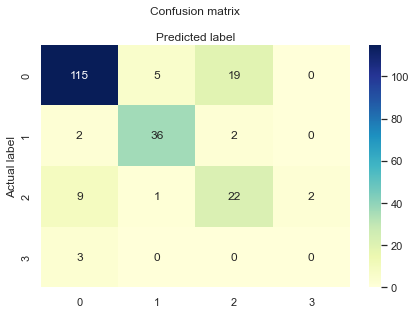

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
Name="LogisticRegression";
DoClassif(logreg,X_train,X_test,y_train,y_test,Name)

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Name="QuadraticDiscriminantAnalysis";
qda = QuadraticDiscriminantAnalysis()
DoClassif(qda,X_train,X_test,y_train,y_test,Name)

from sklearn.svm import SVC
cl = SVC()
Name="SVC";
DoClassif(cl,X_train,X_test,y_train,y_test,Name)

from sklearn.gaussian_process import GaussianProcessClassifier
Name="GaussianProcessClassifier";
cl = GaussianProcessClassifier()
DoClassif(cl,X_train,X_test,y_train,y_test,Name)

from sklearn.tree import DecisionTreeClassifier
cl = DecisionTreeClassifier()
Name="DecisionTreeClassifier";
DoClassif(cl,X_train,X_test,y_train,y_test,Name)
